## <center> This code uses a regression models to predict the outcome of an NBA game<br> based on the teams' ELO ratings and probabilities, as well as their CARM-Elo and Raptor ratings and probabilities.

## Importing Packages

In [105]:
import warnings
warnings.filterwarnings("ignore")

In [106]:
import pandas as pd
import numpy as np

### Read Data

In [107]:
nba = pd.read_csv("data/nba_elo.csv")
nba.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2
0,1946-11-01,1947,0,NaN,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,68.0
1,1946-11-02,1947,0,NaN,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,50.0
2,1946-11-02,1947,0,NaN,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,53.0
3,1946-11-02,1947,0,NaN,STB,PIT,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,51.0
4,1946-11-02,1947,0,NaN,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,47.0


In [108]:
nba_latest = pd.read_csv("data/nba_elo_latest.csv")
nba_latest.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo_prob1,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2
0,2020-12-22,2021,0,NaN,BRK,GSW,1489.190285,1395.123120,0.753458,0.246542,...,NaN,NaN,NaN,NaN,1578.872966,1473.614763,0.749581,0.250419,125.0,99.0
1,2020-12-22,2021,0,NaN,LAL,LAC,1646.074269,1597.210382,0.702019,0.297981,...,NaN,NaN,NaN,NaN,1657.943018,1646.436807,0.616975,0.383025,109.0,116.0
2,2020-12-23,2021,0,NaN,PHI,WAS,1535.022226,1407.244415,0.787713,0.212287,...,NaN,NaN,NaN,NaN,1619.997541,1431.465949,0.815855,0.184145,113.0,107.0
3,2020-12-23,2021,0,NaN,ORL,MIA,1494.650805,1603.157646,0.487760,0.512240,...,NaN,NaN,NaN,NaN,1512.204453,1585.032098,0.497943,0.502057,113.0,107.0
4,2020-12-23,2021,0,NaN,CLE,CHO,1363.405354,1424.016258,0.556444,0.443556,...,NaN,NaN,NaN,NaN,1369.335355,1409.311095,0.554283,0.445717,121.0,114.0


### Create the 'Team Won' column based on the scores


In [109]:
nba['team_won'] = nba.apply(lambda row: row['team1'] if row['score1'] > row['score2'] else row['team2'], axis=1)

# Display the DataFrame
nba.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,team_won
0,1946-11-01,1947,0,NaN,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,68.0,NYK
1,1946-11-02,1947,0,NaN,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,50.0,WSC
2,1946-11-02,1947,0,NaN,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,53.0,PRO
3,1946-11-02,1947,0,NaN,STB,PIT,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,51.0,STB
4,1946-11-02,1947,0,NaN,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,47.0,CHS


In [110]:
nba_latest['team_won'] = nba_latest.apply(lambda row: row['team1'] if row['score1'] > row['score2'] else row['team2'], axis=1)

# Display the DataFrame
nba_latest.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,team_won
0,2020-12-22,2021,0,NaN,BRK,GSW,1489.190285,1395.123120,0.753458,0.246542,...,NaN,NaN,NaN,1578.872966,1473.614763,0.749581,0.250419,125.0,99.0,BRK
1,2020-12-22,2021,0,NaN,LAL,LAC,1646.074269,1597.210382,0.702019,0.297981,...,NaN,NaN,NaN,1657.943018,1646.436807,0.616975,0.383025,109.0,116.0,LAC
2,2020-12-23,2021,0,NaN,PHI,WAS,1535.022226,1407.244415,0.787713,0.212287,...,NaN,NaN,NaN,1619.997541,1431.465949,0.815855,0.184145,113.0,107.0,PHI
3,2020-12-23,2021,0,NaN,ORL,MIA,1494.650805,1603.157646,0.487760,0.512240,...,NaN,NaN,NaN,1512.204453,1585.032098,0.497943,0.502057,113.0,107.0,ORL
4,2020-12-23,2021,0,NaN,CLE,CHO,1363.405354,1424.016258,0.556444,0.443556,...,NaN,NaN,NaN,1369.335355,1409.311095,0.554283,0.445717,121.0,114.0,CLE


### Exploratory data Analysis

In [111]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70688 entries, 0 to 70687
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            70688 non-null  object 
 1   season          70688 non-null  int64  
 2   neutral         70688 non-null  int64  
 3   playoff         4505 non-null   object 
 4   team1           70688 non-null  object 
 5   team2           70688 non-null  object 
 6   elo1_pre        70688 non-null  float64
 7   elo2_pre        70688 non-null  float64
 8   elo_prob1       70688 non-null  float64
 9   elo_prob2       70688 non-null  float64
 10  elo1_post       70661 non-null  float64
 11  elo2_post       70661 non-null  float64
 12  carm-elo1_pre   5249 non-null   float64
 13  carm-elo2_pre   5249 non-null   float64
 14  carm-elo_prob1  5249 non-null   float64
 15  carm-elo_prob2  5249 non-null   float64
 16  carm-elo1_post  5249 non-null   float64
 17  carm-elo2_post  5249 non-null  

## Visualizations

#### Most Wins by Team

This visualization shows the number of wins by each NBA team in the dataset.



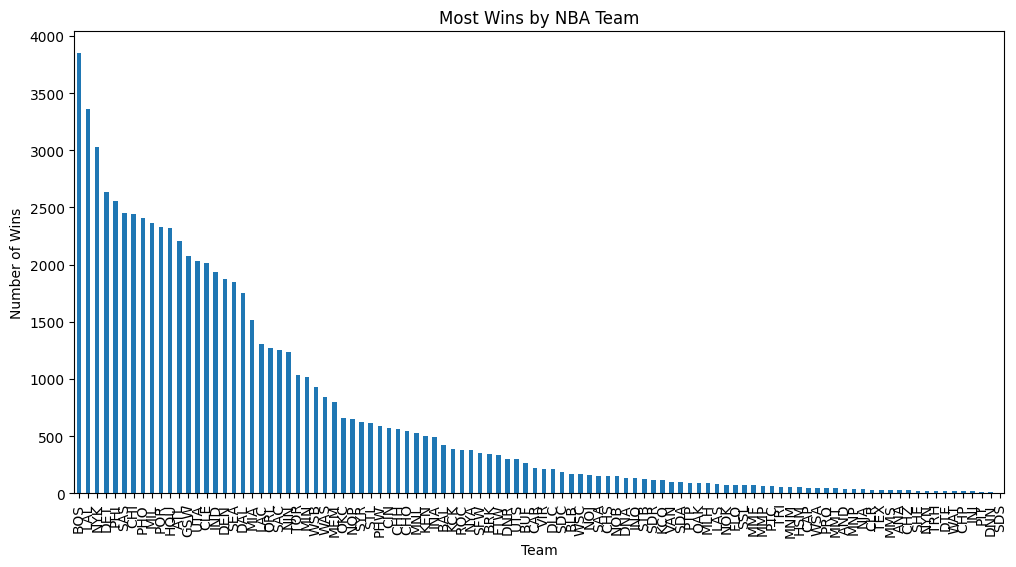

In [112]:
import matplotlib.pyplot as plt

# Group the data by 'team_won' and count the occurrences
team_wins = nba['team_won'].value_counts()

# Create a bar plot
team_wins.plot(kind='bar', figsize=(12, 6))
plt.title("Most Wins by NBA Team")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.show()


#### Matches Played by Season

This visualization illustrates the number of matches played in each NBA season.



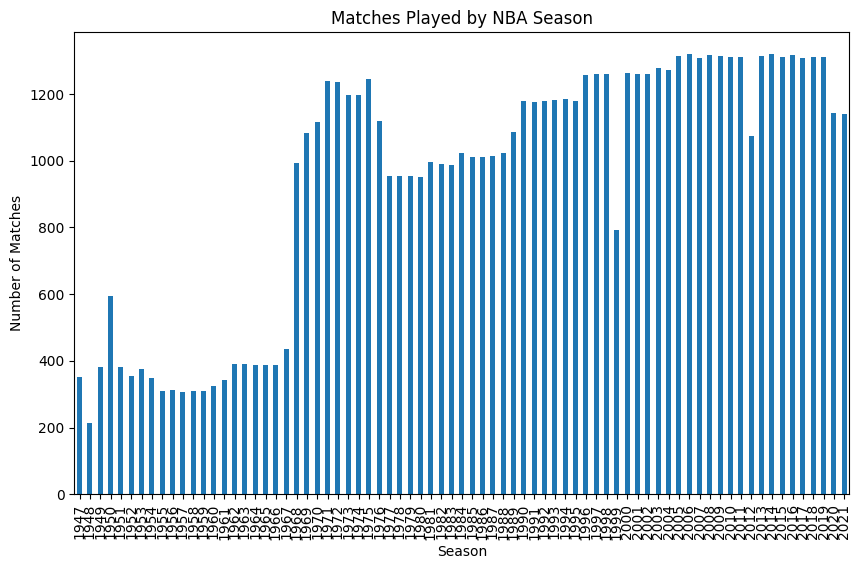

In [113]:
# Group the data by 'season' and count the occurrences
matches_per_season = nba['season'].value_counts().sort_index()

# Create a bar plot
matches_per_season.plot(kind='bar', figsize=(10, 6))
plt.title("Matches Played by NBA Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.show()


#### Venues with the Most Matches

This visualization displays the venues with the highest number of matches played.



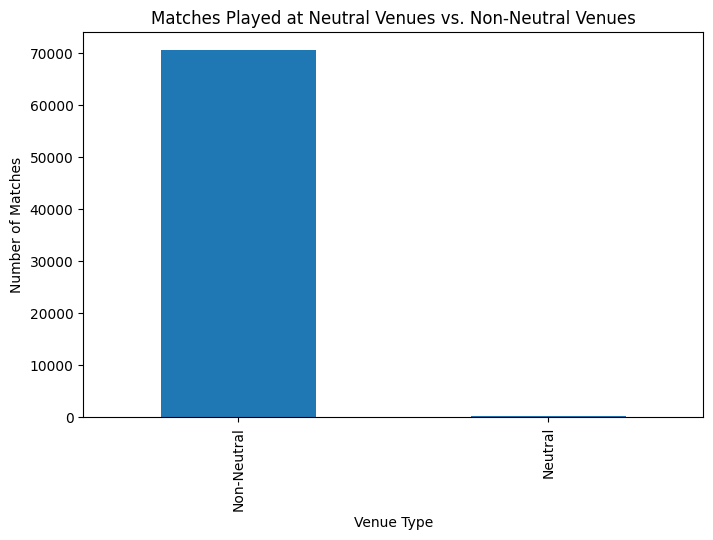

In [114]:
# Group the data by 'neutral' and count the occurrences
venue_matches = nba['neutral'].value_counts()

# Create a bar plot
venue_matches.plot(kind='bar', figsize=(8, 5))
plt.title("Matches Played at Neutral Venues vs. Non-Neutral Venues")
plt.xticks([0, 1], ['Non-Neutral', 'Neutral'])
plt.xlabel("Venue Type")
plt.ylabel("Number of Matches")
plt.show()


#### Season-Wise Win Percentage

This visualization shows the win percentage of a specific team (e.g., 'Team 1') across different seasons.

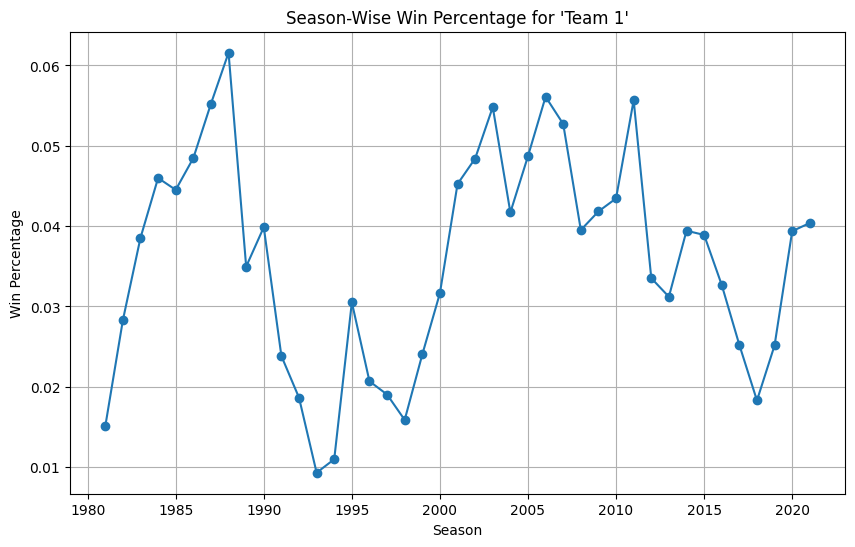

In [115]:
# Filter the data for 'Team' wins
team1_wins = nba[nba['team_won'] == 'DAL']

# Group the filtered data by 'season' and calculate the win percentage
win_percentage = team1_wins.groupby('season')['team_won'].count() / matches_per_season

# Create a line plot
win_percentage.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Season-Wise Win Percentage for 'Team 1'")
plt.xlabel("Season")
plt.ylabel("Win Percentage")
plt.grid()
plt.show()


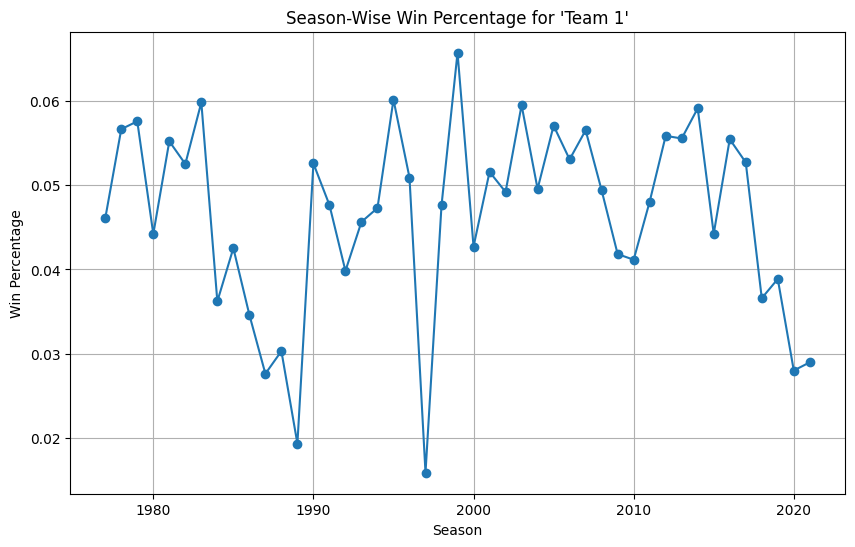

In [116]:
# Filter the data for 'Team' wins
team1_wins = nba[nba['team_won'] == 'SAS']

# Group the filtered data by 'season' and calculate the win percentage
win_percentage = team1_wins.groupby('season')['team_won'].count() / matches_per_season

# Create a line plot
win_percentage.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Season-Wise Win Percentage for 'Team 1'")
plt.xlabel("Season")
plt.ylabel("Win Percentage")
plt.grid()
plt.show()


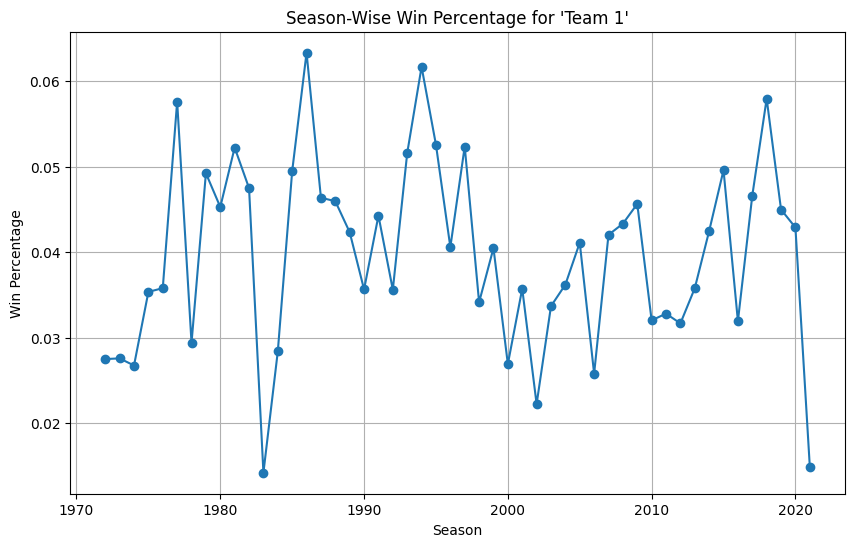

In [117]:
# Filter the data for 'Team' wins
team1_wins = nba[nba['team_won'] == 'HOU']

# Group the filtered data by 'season' and calculate the win percentage
win_percentage = team1_wins.groupby('season')['team_won'].count() / matches_per_season

# Create a line plot
win_percentage.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Season-Wise Win Percentage for 'Team 1'")
plt.xlabel("Season")
plt.ylabel("Win Percentage")
plt.grid()
plt.show()


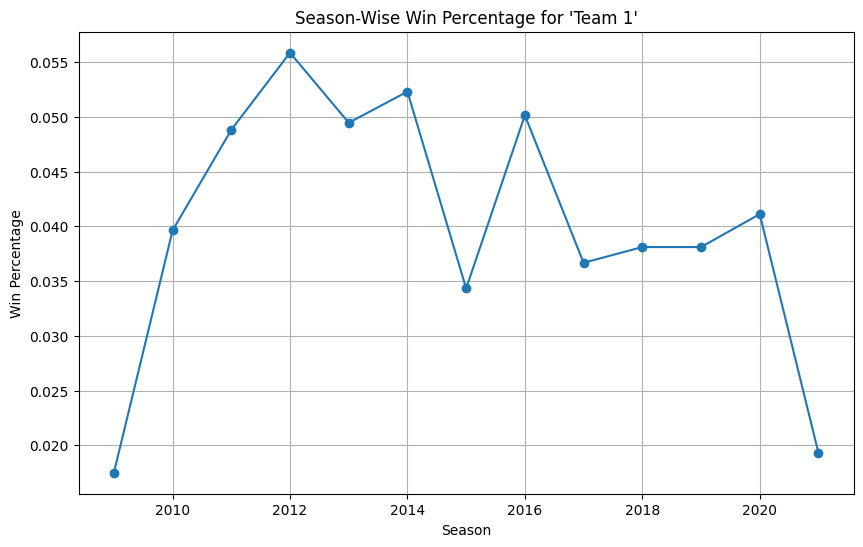

In [118]:
# Filter the data for 'Team' wins
team1_wins = nba[nba['team_won'] == 'OKC']

# Group the filtered data by 'season' and calculate the win percentage
win_percentage = team1_wins.groupby('season')['team_won'].count() / matches_per_season

# Create a line plot
win_percentage.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Season-Wise Win Percentage for 'Team 1'")
plt.xlabel("Season")
plt.ylabel("Win Percentage")
plt.grid()
plt.show()


#### Distribution of Elo Ratings

This visualization displays the distribution of Elo ratings for 'Team 1' and 'Team 2' before a match.



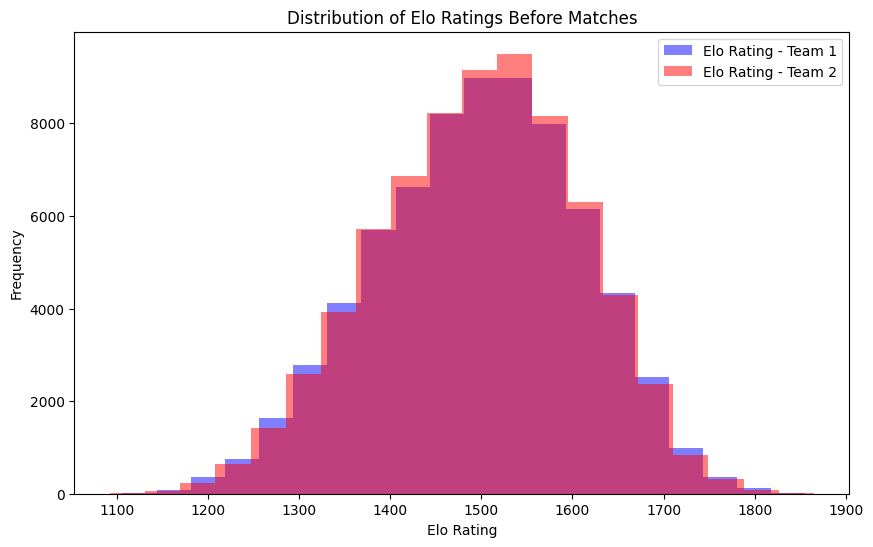

In [119]:
# Plot histograms for 'elo1_pre' and 'elo2_pre'
plt.figure(figsize=(10, 6))
plt.hist(nba['elo1_pre'], bins=20, alpha=0.5, label='Elo Rating - Team 1', color='blue')
plt.hist(nba['elo2_pre'], bins=20, alpha=0.5, label='Elo Rating - Team 2', color='red')
plt.title("Distribution of Elo Ratings Before Matches")
plt.xlabel("Elo Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()


#### Playoff vs. Non-Playoff Matches

This visualization shows the number of playoff and non-playoff matches for each season.


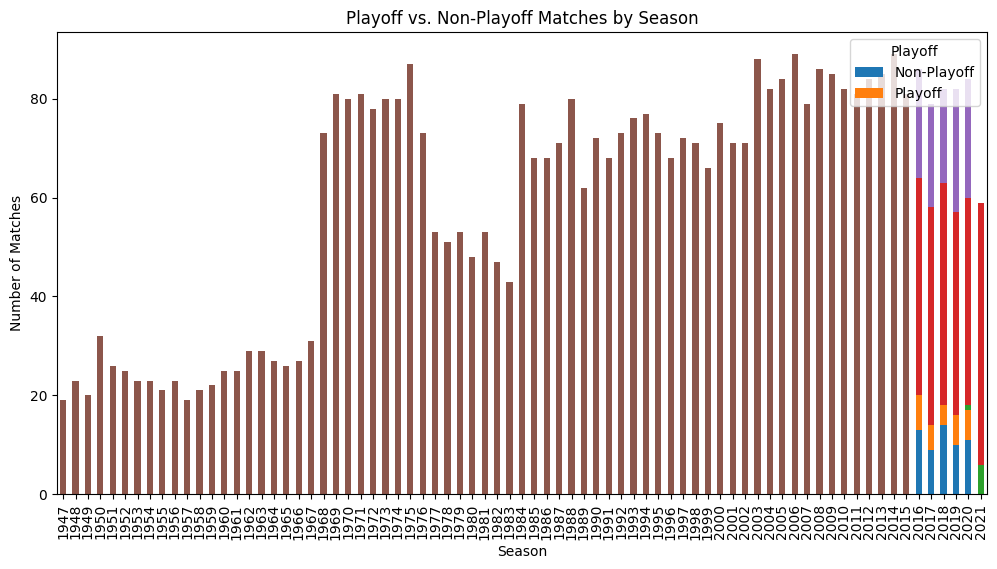

In [120]:
# Group the data by 'season' and 'playoff' and count the occurrences
playoff_vs_non_playoff = nba.groupby(['season', 'playoff'])['date'].count().unstack()

# Create a stacked bar plot
playoff_vs_non_playoff.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Playoff vs. Non-Playoff Matches by Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.legend(title='Playoff', labels=['Non-Playoff', 'Playoff'], loc='upper right')
plt.show()


#### Elo Rating Distribution by Season

This visualization displays the distribution of Elo ratings for both teams before matches, grouped by season, using box plots.

<Figure size 1200x600 with 0 Axes>

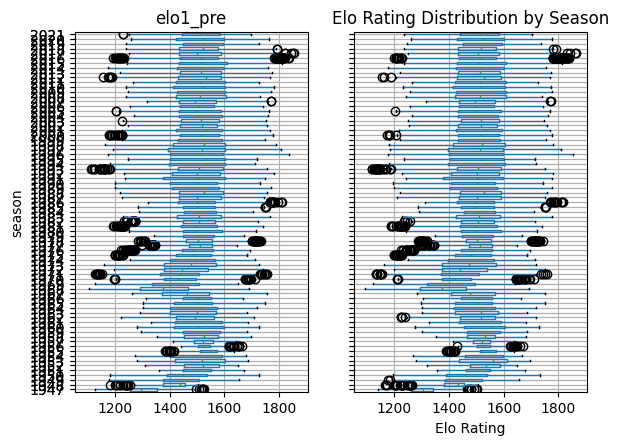

In [121]:
# Create a box plot for Elo ratings grouped by season
plt.figure(figsize=(12, 6))
nba.boxplot(column=['elo1_pre', 'elo2_pre'], by='season', vert=False)
plt.title("Elo Rating Distribution by Season")
plt.xlabel("Elo Rating")
plt.ylabel("Season")
plt.suptitle("")
plt.show()


#### Correlation Matrix

This heatmap shows the correlation matrix between various numerical variables, such as Elo ratings, probabilities, and scores.

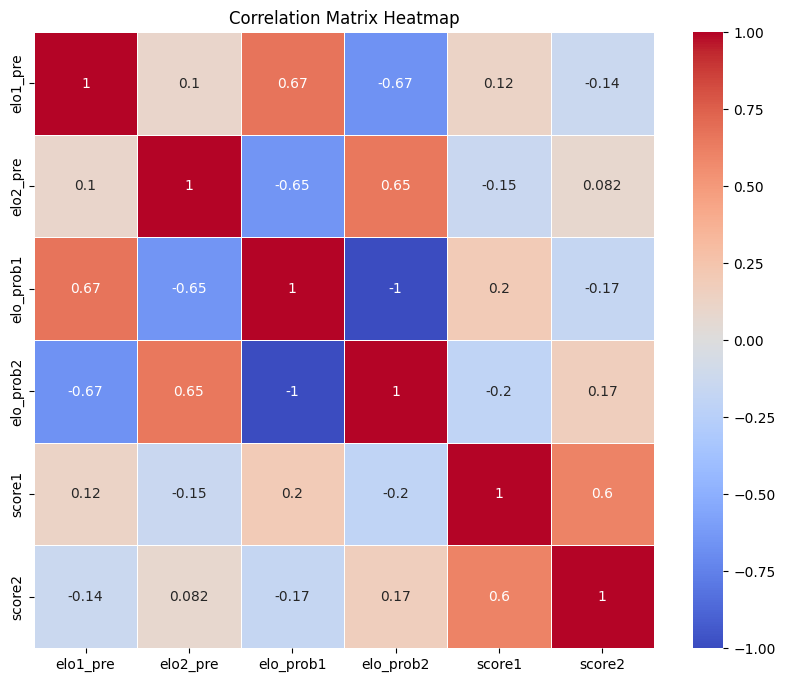

In [122]:
import seaborn as sns

# Select relevant numerical columns for correlation analysis
numerical_columns = ['elo1_pre', 'elo2_pre', 'elo_prob1', 'elo_prob2', 'score1', 'score2']

# Calculate the correlation matrix
correlation_matrix = nba[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


### Chart of matches during Covid-19. Including the team matches and performance in the year 2020,2021.

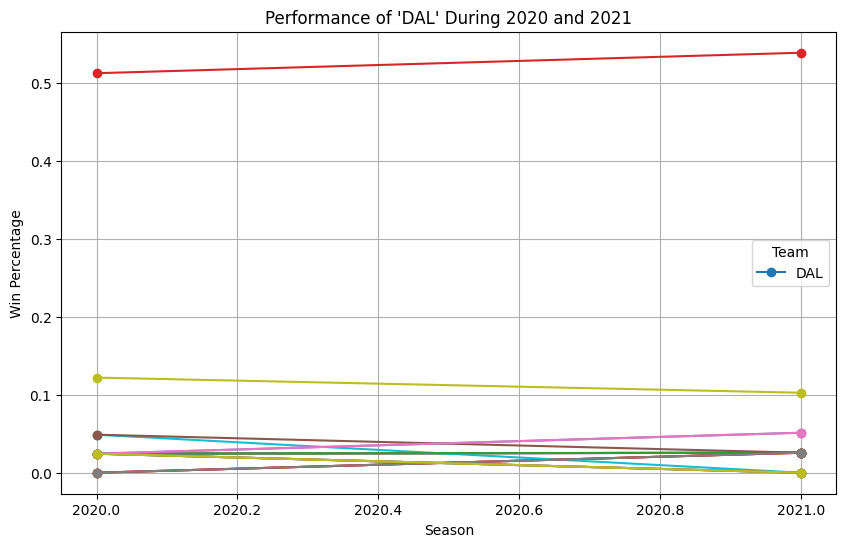

In [123]:
import matplotlib.pyplot as plt

# Filter the data for the years 2020 and 2021
covid_data = nba[nba['season'].isin([2020, 2021])]

# Filter the data for 'Team 1' matches
team1_data = covid_data[covid_data['team1'] == 'DAL']

# Group the data by 'season' and calculate the win percentage for 'Team 1'
win_percentage = team1_data.groupby('season')['team_won'].value_counts(normalize=True).unstack().fillna(0)

# Create a line plot
win_percentage.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Performance of 'DAL' During 2020 and 2021")
plt.xlabel("Season")
plt.ylabel("Win Percentage")
plt.grid()
plt.legend(title='Team', labels=['DAL'])
plt.show()


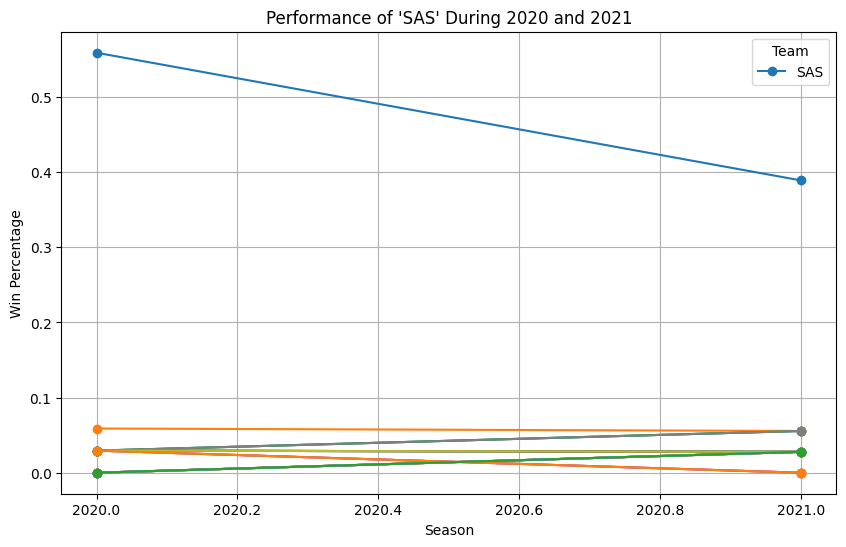

In [124]:
import matplotlib.pyplot as plt

# Filter the data for the years 2020 and 2021
covid_data = nba[nba['season'].isin([2020, 2021])]

# Filter the data for 'Team 1' matches
team1_data = covid_data[covid_data['team1'] == 'SAS']

# Group the data by 'season' and calculate the win percentage for 'Team 1'
win_percentage = team1_data.groupby('season')['team_won'].value_counts(normalize=True).unstack().fillna(0)

# Create a line plot
win_percentage.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Performance of 'SAS' During 2020 and 2021")
plt.xlabel("Season")
plt.ylabel("Win Percentage")
plt.grid()
plt.legend(title='Team', labels=['SAS'])
plt.show()


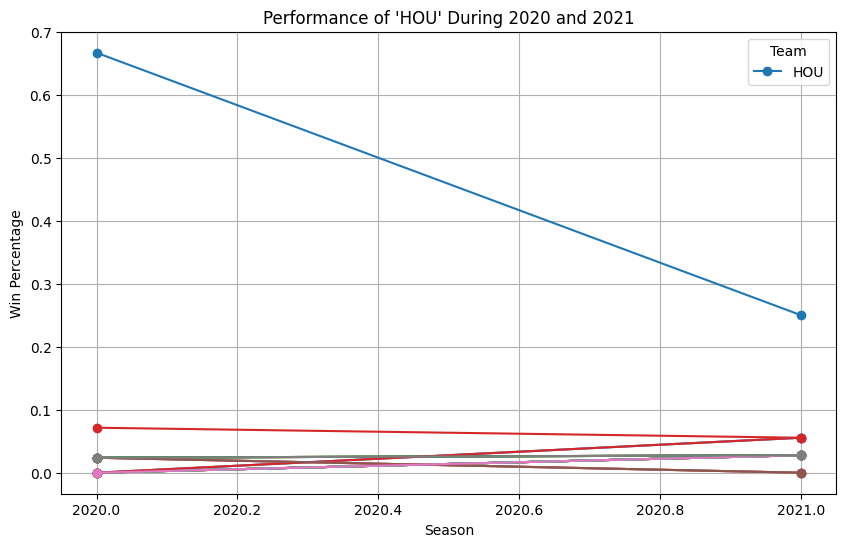

In [125]:
import matplotlib.pyplot as plt

# Filter the data for the years 2020 and 2021
covid_data = nba[nba['season'].isin([2020, 2021])]

# Filter the data for 'Team 1' matches
team1_data = covid_data[covid_data['team1'] == 'HOU']

# Group the data by 'season' and calculate the win percentage for 'Team 1'
win_percentage = team1_data.groupby('season')['team_won'].value_counts(normalize=True).unstack().fillna(0)

# Create a line plot
win_percentage.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Performance of 'HOU' During 2020 and 2021")
plt.xlabel("Season")
plt.ylabel("Win Percentage")
plt.grid()
plt.legend(title='Team', labels=['HOU'])
plt.show()


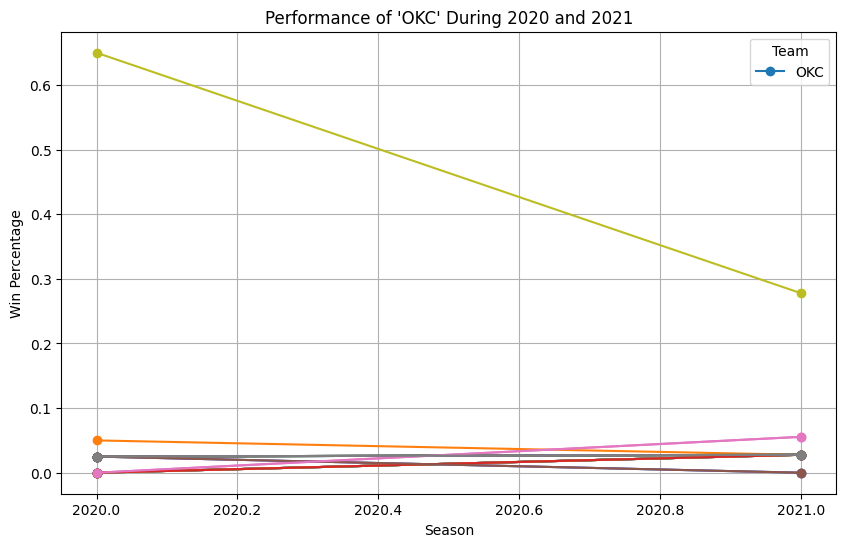

In [126]:
import matplotlib.pyplot as plt

# Filter the data for the years 2020 and 2021
covid_data = nba[nba['season'].isin([2020, 2021])]

# Filter the data for 'Team 1' matches
team1_data = covid_data[covid_data['team1'] == 'OKC']

# Group the data by 'season' and calculate the win percentage for 'Team 1'
win_percentage = team1_data.groupby('season')['team_won'].value_counts(normalize=True).unstack().fillna(0)

# Create a line plot
win_percentage.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Performance of 'OKC' During 2020 and 2021")
plt.xlabel("Season")
plt.ylabel("Win Percentage")
plt.grid()
plt.legend(title='Team', labels=['OKC'])
plt.show()


# Specific Visualization

## Dallas Mavericks'

#### Performance Over Time
This line plot shows the performance over time, based on the number of wins.

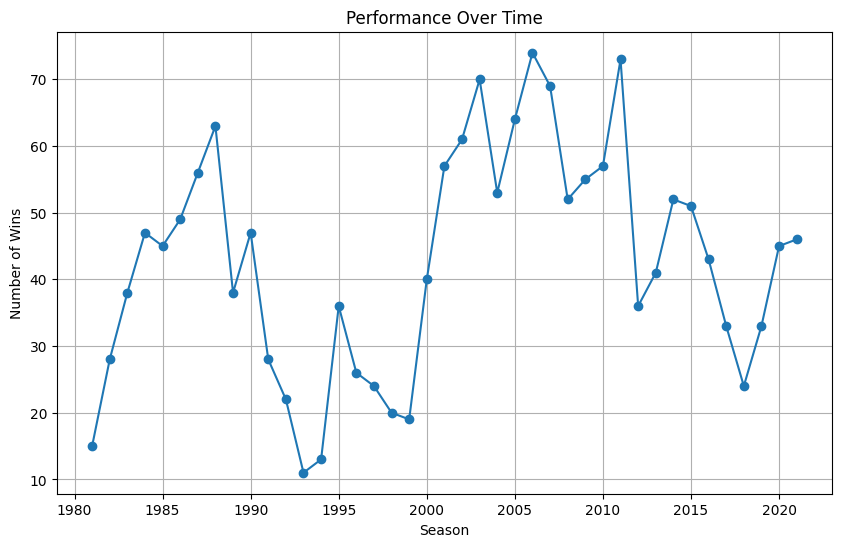

In [127]:
import matplotlib.pyplot as plt

# Filter the data Team in Team 1 or Team 2
dal_data = nba[(nba['team1'] == 'DAL') | (nba['team2'] == 'DAL')]

# Group the data by 'season' and calculate the number of wins for DAL
wins_by_season = dal_data[dal_data['team_won'] == 'DAL'].groupby('season')['team_won'].count()

# Create a line plot
wins_by_season.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Performance Over Time")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.grid()
plt.show()


#### Match Ratings
This box plot shows the distribution of match ratings for Team over the years.


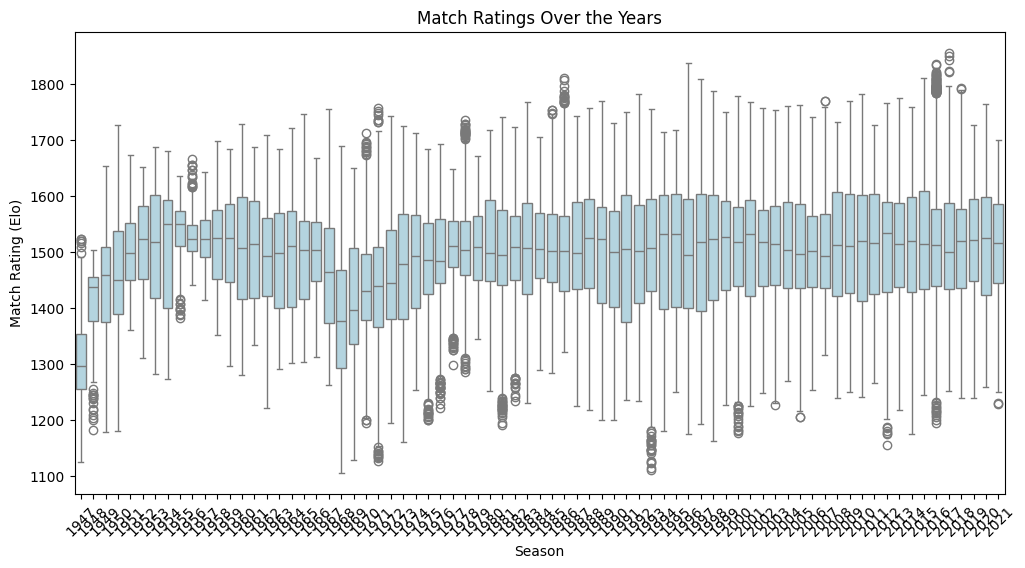

In [128]:
# Filter the data for Team matches
dal_matches = nba[['season', 'team1', 'team2', 'elo1_pre', 'elo2_pre', 'carm-elo1_pre', 'carm-elo2_pre', 'raptor1_pre', 'raptor2_pre']]

# Create a box plot for match ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='elo1_pre', data=dal_matches, color='lightblue')
plt.title("Match Ratings Over the Years")
plt.xlabel("Season")
plt.ylabel("Match Rating (Elo)")
plt.xticks(rotation=45)
plt.show()


#### Ratings Over Time
This visualization displays multiple line plots for various ratings (Elo, CARMELO, RAPTOR) over time.



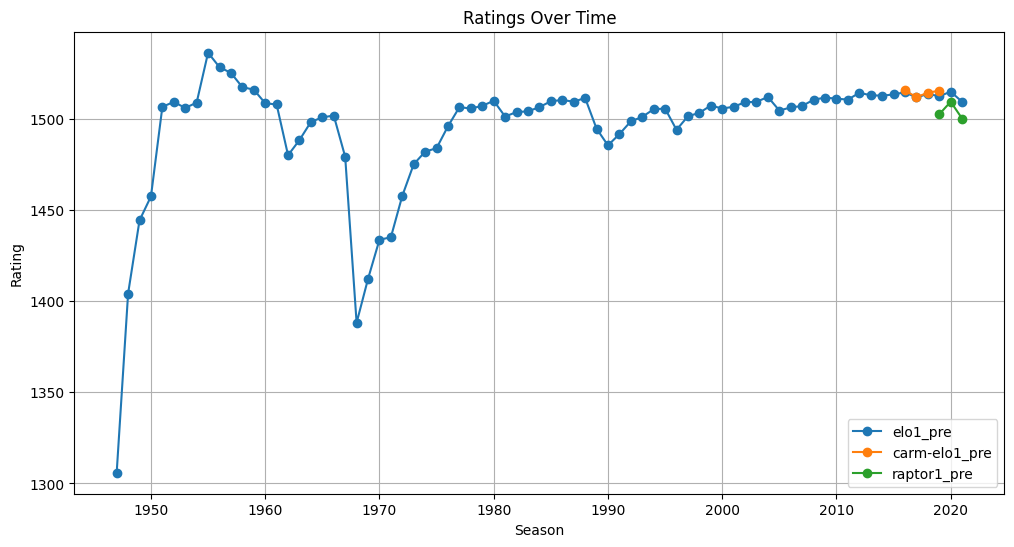

In [129]:
# Filter the data for Team matches
dal_ratings = nba[['season', 'elo1_pre', 'carm-elo1_pre', 'raptor1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = dal_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()


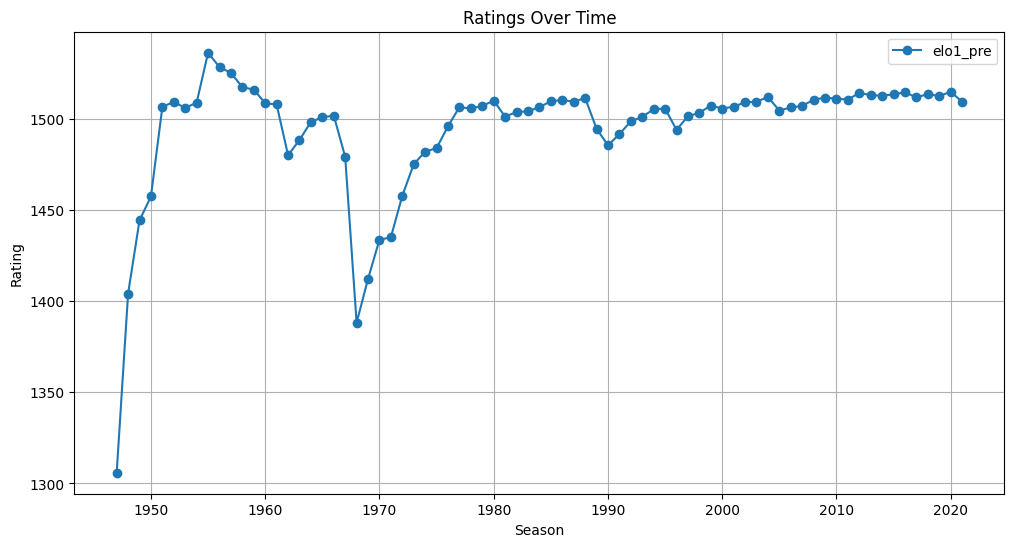

In [130]:
# Filter the data for Team matches
dal_ratings = nba[['season', 'elo1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = dal_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

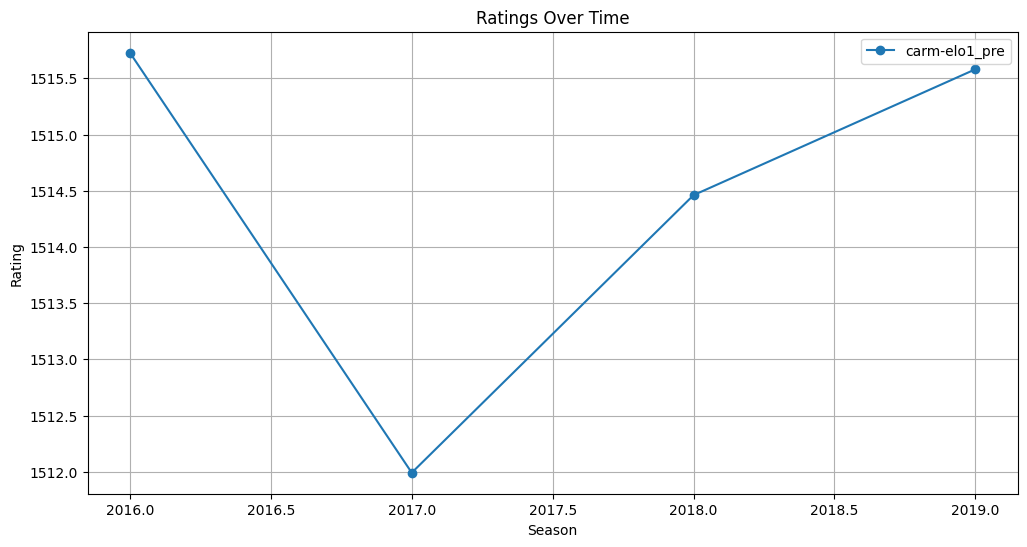

In [131]:
# Filter the data for Team matches
dal_ratings = nba[['season', 'carm-elo1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = dal_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

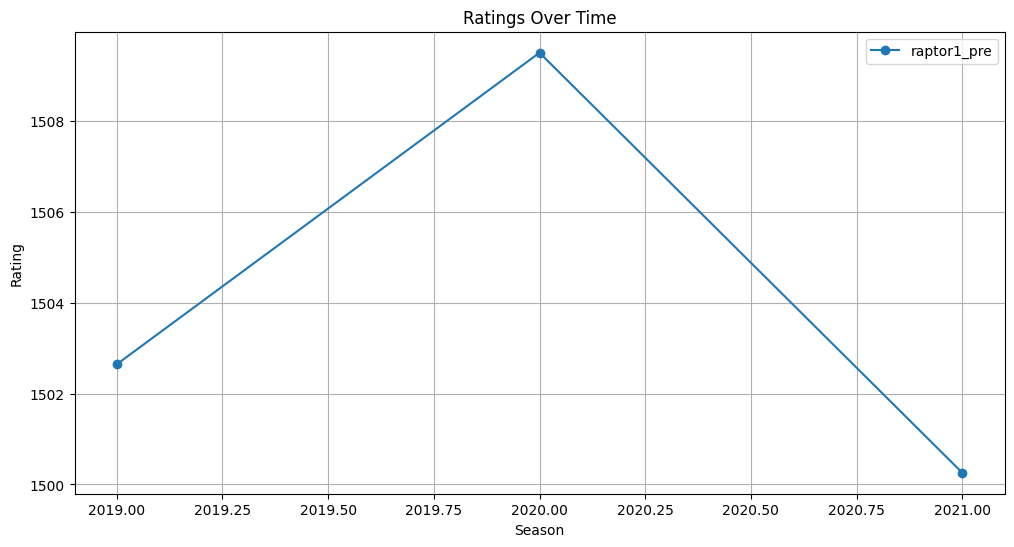

In [132]:
# Filter the data for Team matches
dal_ratings = nba[['season', 'raptor1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = dal_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

## San Antonio Spurs

#### Performance Over Time
This line plot shows the performance over time, based on the number of wins.

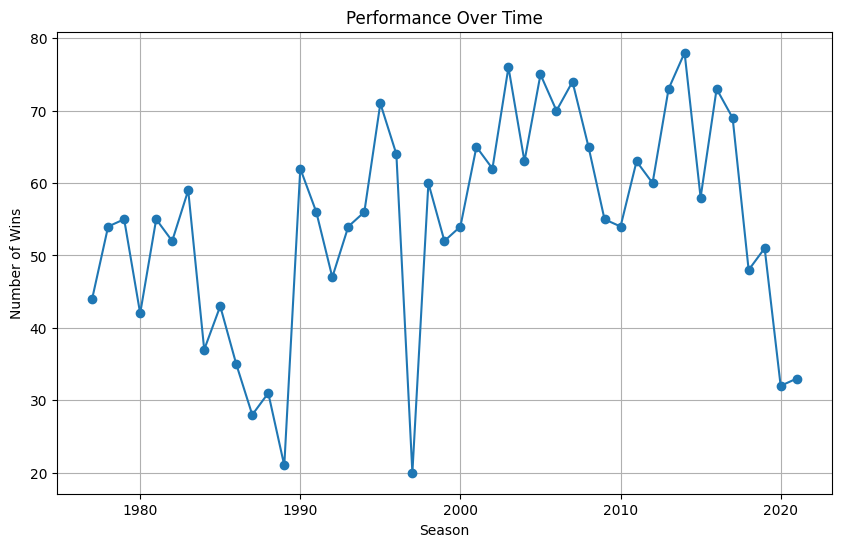

In [133]:
# Filter the data Team in Team 1 or Team 2
sas_data = nba[(nba['team1'] == 'SAS') | (nba['team2'] == 'SAS')]

# Group the data by 'season' and calculate the number of wins for DAL
wins_by_season = sas_data[sas_data['team_won'] == 'SAS'].groupby('season')['team_won'].count()

# Create a line plot
wins_by_season.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Performance Over Time")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.grid()
plt.show()

#### Match Ratings
This box plot shows the distribution of match ratings for Team over the years.

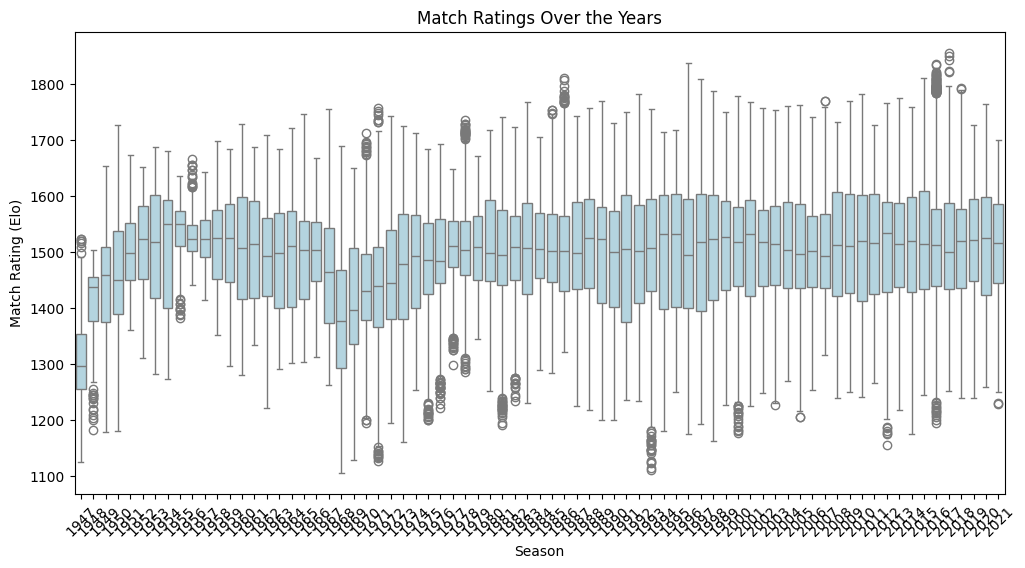

In [134]:
# Filter the data for Team matches
sas_matches = nba[['season', 'team1', 'team2', 'elo1_pre', 'elo2_pre', 'carm-elo1_pre', 'carm-elo2_pre', 'raptor1_pre', 'raptor2_pre']]

# Create a box plot for match ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='elo1_pre', data=sas_matches, color='lightblue')
plt.title("Match Ratings Over the Years")
plt.xlabel("Season")
plt.ylabel("Match Rating (Elo)")
plt.xticks(rotation=45)
plt.show()


#### Ratings Over Time
This visualization displays multiple line plots for various ratings (Elo, CARMELO, RAPTOR) over time.

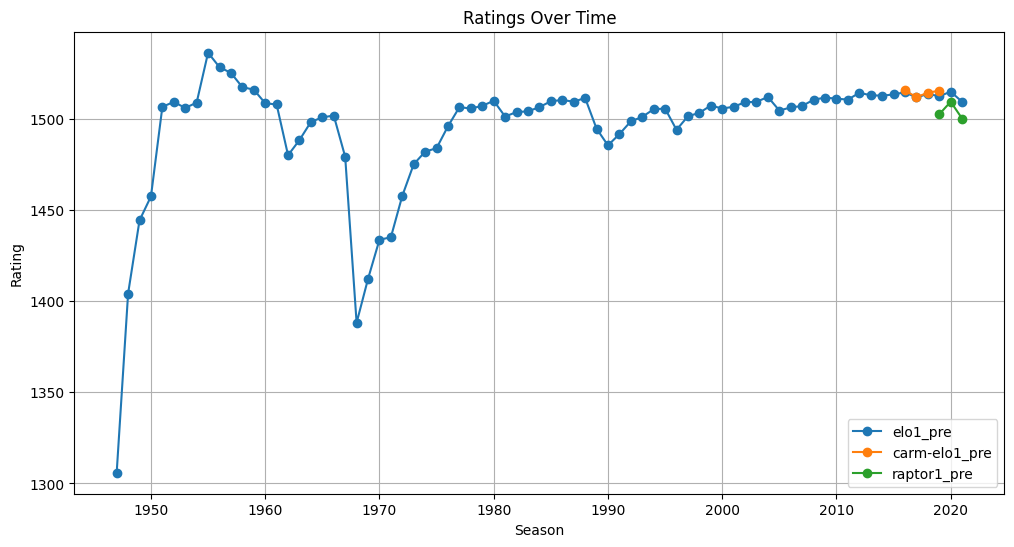

In [135]:
# Filter the data for Team matches
sas_ratings = nba[['season', 'elo1_pre', 'carm-elo1_pre', 'raptor1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = sas_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

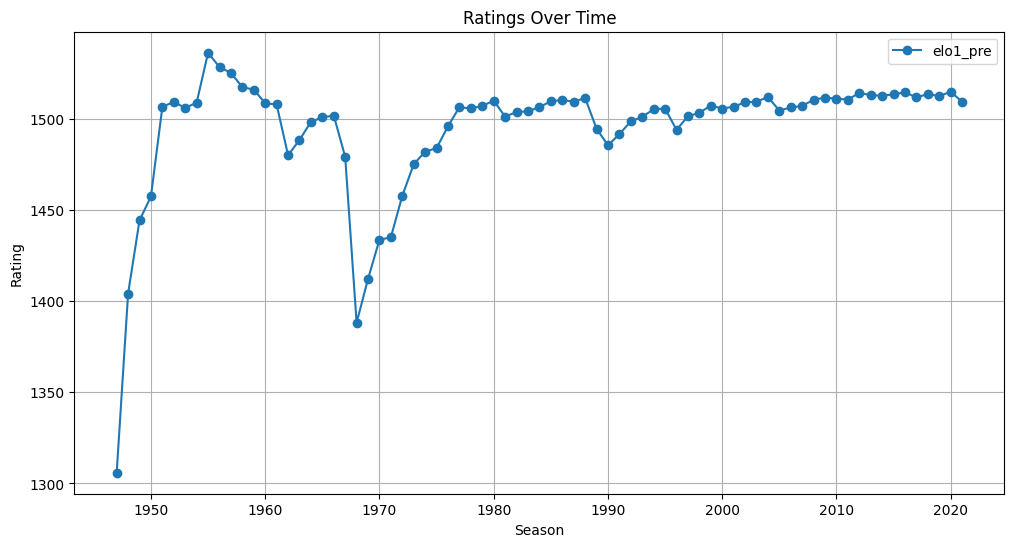

In [136]:
# Filter the data for Team matches
sas_ratings = nba[['season', 'elo1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = sas_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

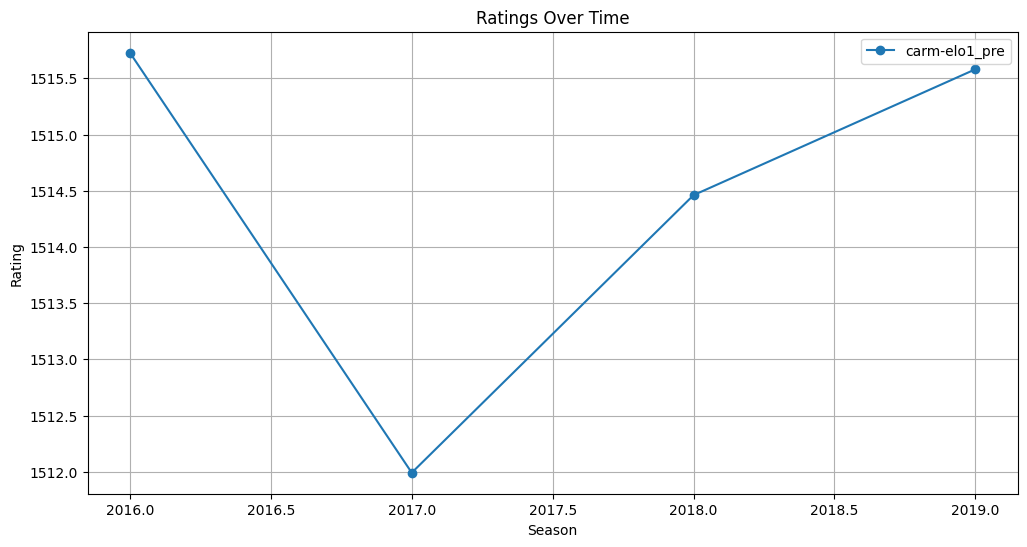

In [137]:
# Filter the data for Team matches
sas_ratings = nba[['season', 'carm-elo1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = sas_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

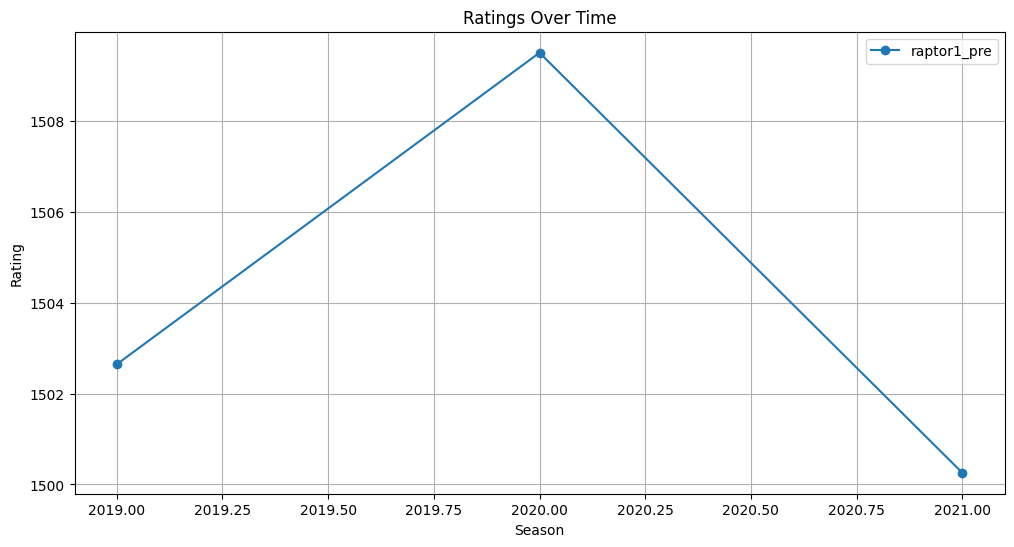

In [138]:
# Filter the data for Team matches
sas_ratings = nba[['season', 'raptor1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = sas_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

## Houston Rockets


#### Performance Over Time
This line plot shows the performance over time, based on the number of wins.

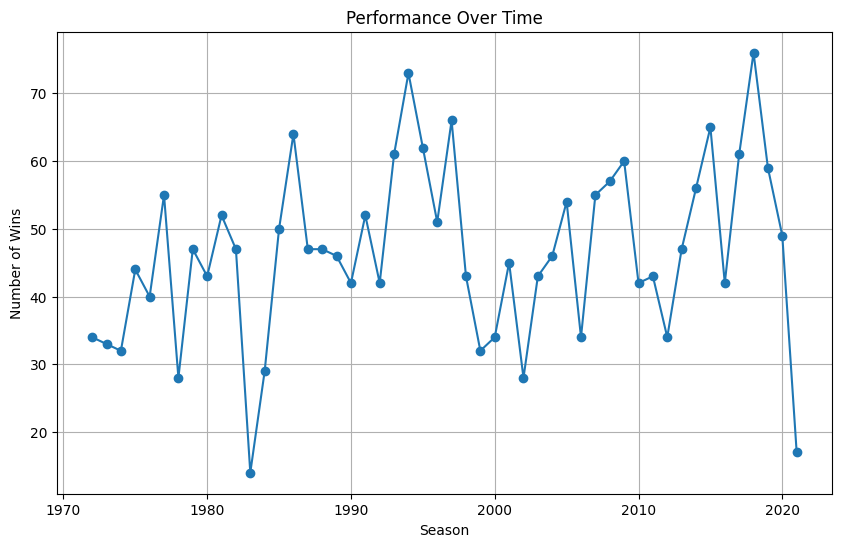

In [139]:
# Filter the data Team in Team 1 or Team 2
hou_data = nba[(nba['team1'] == 'HOU') | (nba['team2'] == 'HOU')]

# Group the data by 'season' and calculate the number of wins for DAL
wins_by_season = hou_data[hou_data['team_won'] == 'HOU'].groupby('season')['team_won'].count()

# Create a line plot
wins_by_season.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Performance Over Time")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.grid()
plt.show()

#### Match Ratings
This box plot shows the distribution of match ratings for Team over the years.

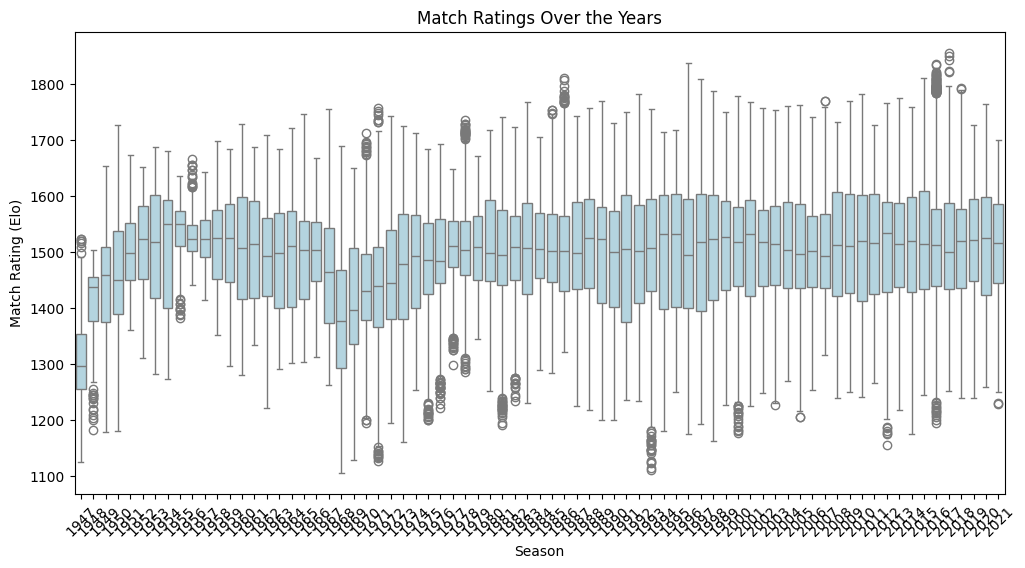

In [140]:
# Filter the data for Team matches
hou_matches = nba[['season', 'team1', 'team2', 'elo1_pre', 'elo2_pre', 'carm-elo1_pre', 'carm-elo2_pre', 'raptor1_pre', 'raptor2_pre']]

# Create a box plot for match ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='elo1_pre', data=hou_matches, color='lightblue')
plt.title("Match Ratings Over the Years")
plt.xlabel("Season")
plt.ylabel("Match Rating (Elo)")
plt.xticks(rotation=45)
plt.show()


#### Ratings Over Time
This visualization displays multiple line plots for various ratings (Elo, CARMELO, RAPTOR) over time.

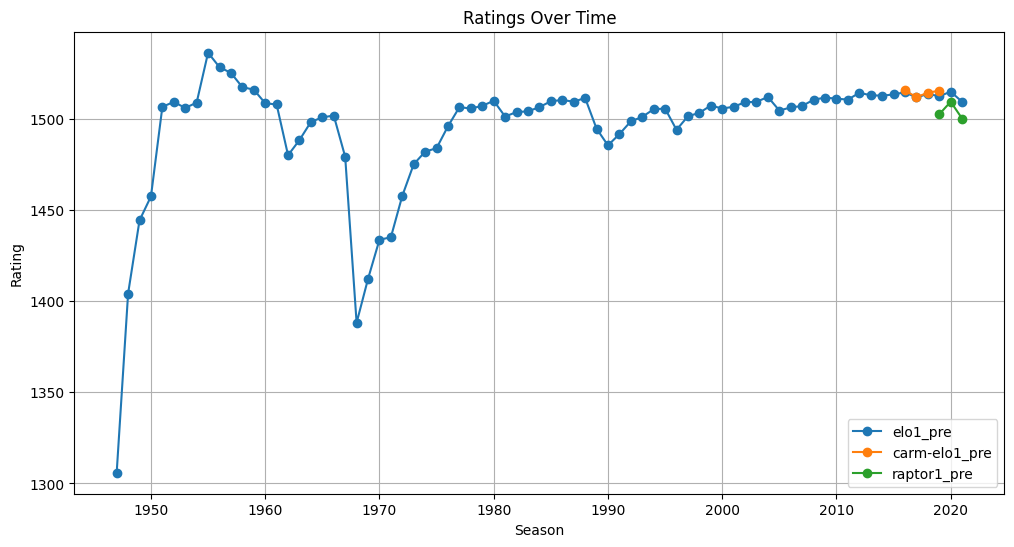

In [141]:
# Filter the data for Team matches
hou_ratings = nba[['season', 'elo1_pre', 'carm-elo1_pre', 'raptor1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = hou_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

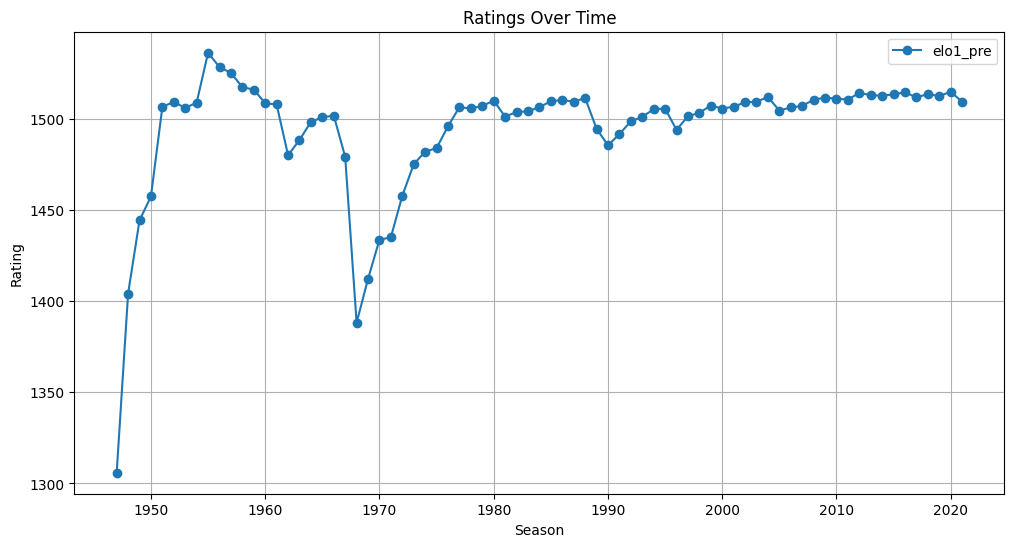

In [142]:
# Filter the data for Team matches
hou_ratings = nba[['season', 'elo1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = hou_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

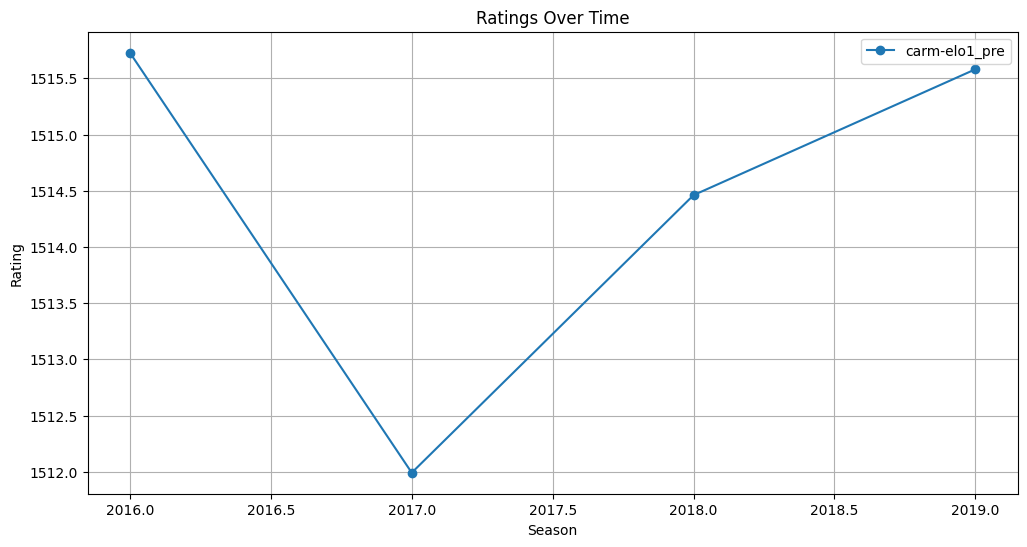

In [143]:
# Filter the data for Team matches
hou_ratings = nba[['season', 'carm-elo1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = hou_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

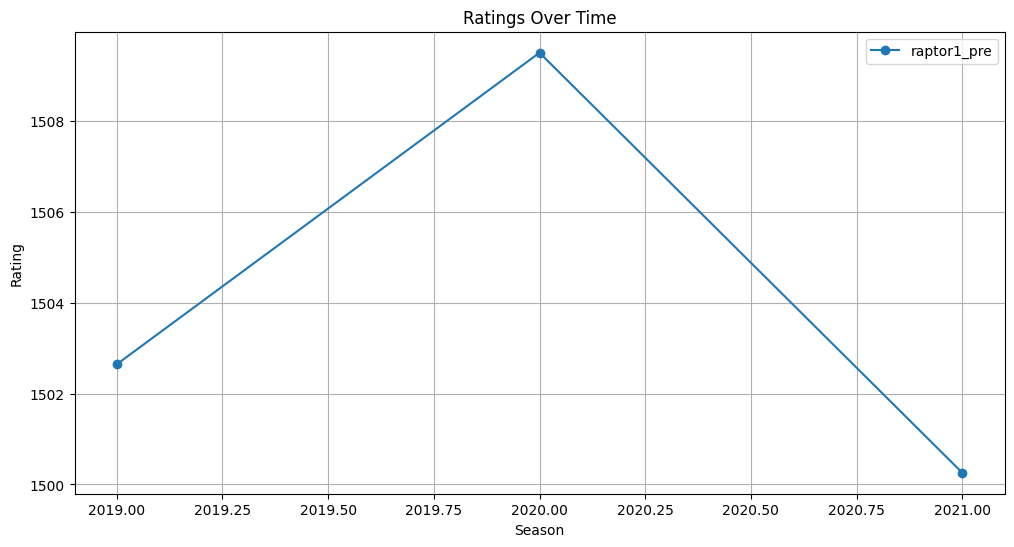

In [144]:
# Filter the data for Team matches
hou_ratings = nba[['season', 'raptor1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = hou_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

## Oklahoma City Thunders


#### Performance Over Time
This line plot shows the performance over time, based on the number of wins.

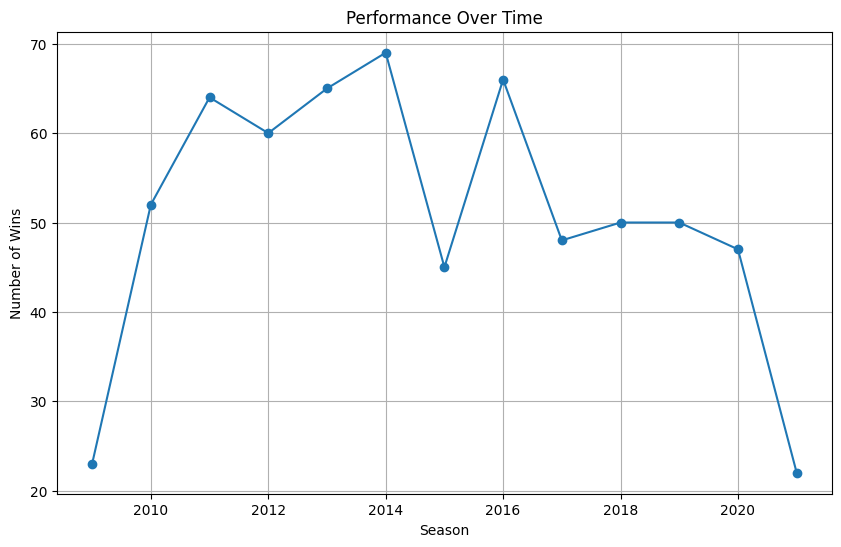

In [145]:
# Filter the data Team in Team 1 or Team 2
okc_data = nba[(nba['team1'] == 'OKC') | (nba['team2'] == 'OKC')]

# Group the data by 'season' and calculate the number of wins for DAL
wins_by_season = okc_data[okc_data['team_won'] == 'OKC'].groupby('season')['team_won'].count()

# Create a line plot
wins_by_season.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Performance Over Time")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.grid()
plt.show()

#### Match Ratings
This box plot shows the distribution of match ratings for Team over the years.

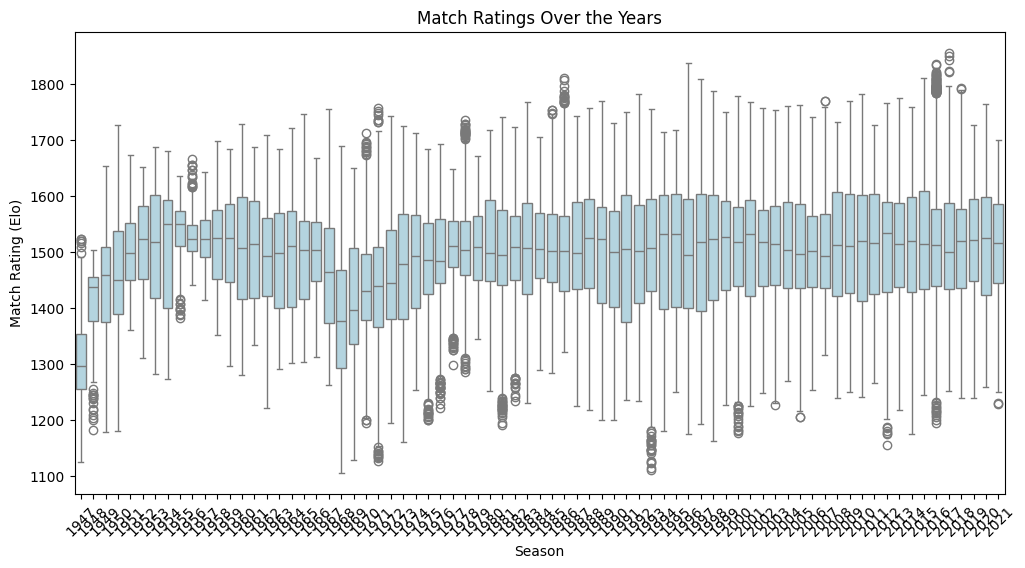

In [146]:
# Filter the data for Team matches
okc_matches = nba[['season', 'team1', 'team2', 'elo1_pre', 'elo2_pre', 'carm-elo1_pre', 'carm-elo2_pre', 'raptor1_pre', 'raptor2_pre']]

# Create a box plot for match ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='elo1_pre', data=okc_matches, color='lightblue')
plt.title("Match Ratings Over the Years")
plt.xlabel("Season")
plt.ylabel("Match Rating (Elo)")
plt.xticks(rotation=45)
plt.show()


#### Ratings Over Time
This visualization displays multiple line plots for various ratings (Elo, CARMELO, RAPTOR) over time.

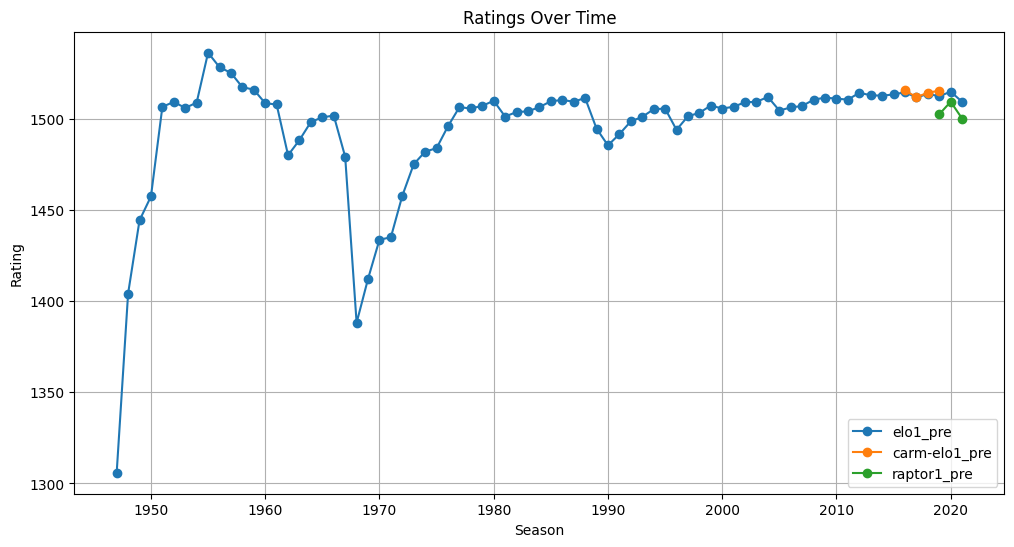

In [147]:
# Filter the data for Team matches
okc_ratings = nba[['season', 'elo1_pre', 'carm-elo1_pre', 'raptor1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = okc_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

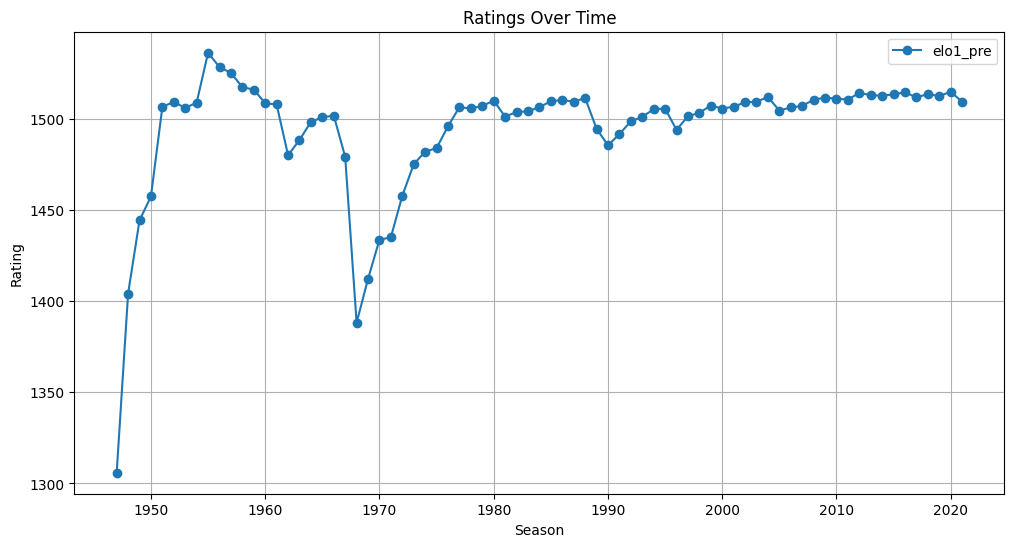

In [148]:
# Filter the data for Team matches
okc_ratings = nba[['season', 'elo1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = okc_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

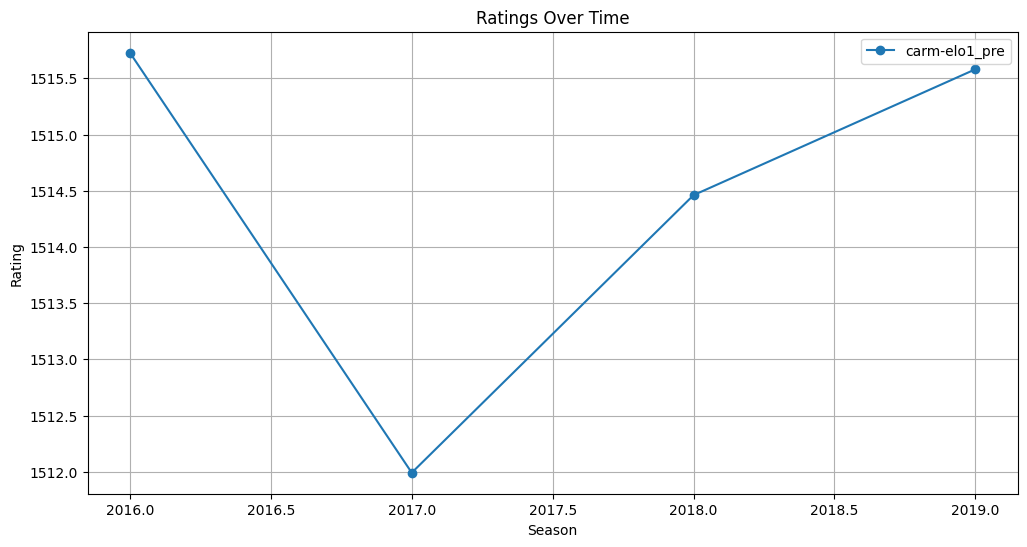

In [149]:
# Filter the data for Team matches
okc_ratings = nba[['season', 'carm-elo1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = okc_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

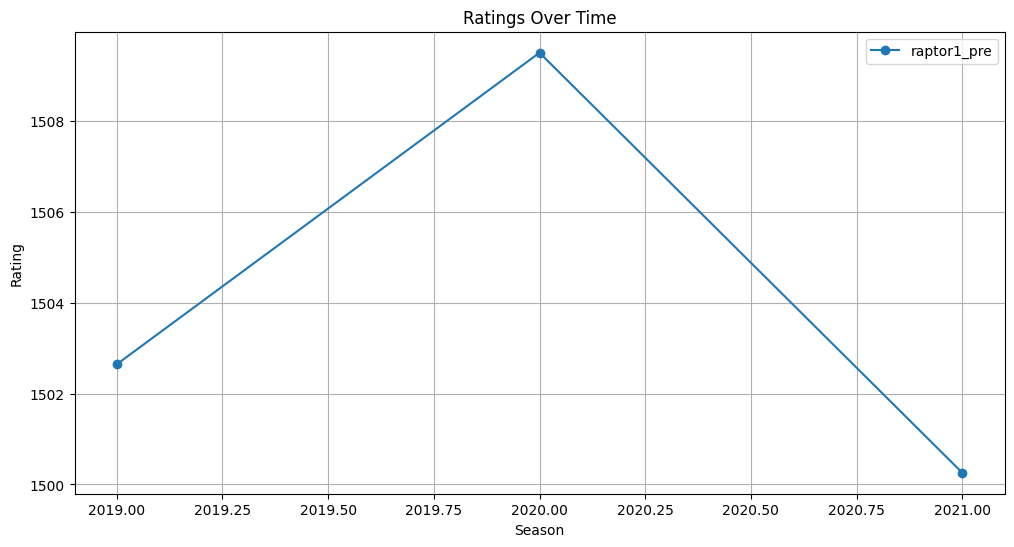

In [150]:
# Filter the data for Team matches
okc_ratings = nba[['season','raptor1_pre']]

# Group the data by 'season' and calculate the mean ratings
mean_ratings = okc_ratings.groupby('season').mean()

# Create multiple line plots for different ratings
plt.figure(figsize=(12, 6))
for col in mean_ratings.columns:
    plt.plot(mean_ratings.index, mean_ratings[col], marker='o', label=col)

plt.title("Ratings Over Time")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.legend()
plt.grid()
plt.show()

## Data Cleaning

In [151]:
# Define the features used for training the model
features = np.array(['elo1_pre', 'elo2_pre', 'elo_prob1', 'elo_prob2', 'carm-elo1_pre', 'carm-elo2_pre', 'carm-elo_prob1', 'carm-elo_prob2', 'raptor1_pre', 'raptor2_pre', 'raptor_prob1', 'raptor_prob2'])


In [152]:
# Remove any missing or duplicate data
nba = nba.dropna(subset=features).reset_index(drop=True)
nba = nba.drop_duplicates().reset_index(drop=True)

# Remove any missing or duplicate data
nba_latest = nba_latest.dropna(subset=features).reset_index(drop=True)
nba_latest = nba_latest.drop_duplicates().reset_index(drop=True)

In [153]:
nba.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo_prob2,carm-elo1_post,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,team_won
0,2018-10-16,2019,0,NaN,BOS,PHI,1561.524193,1607.057688,0.577748,0.422252,...,0.346833,1642.710639,1607.289361,1633.000000,1617.000000,0.653167,0.346833,105.0,87.0,BOS
1,2018-10-16,2019,0,NaN,GSW,OKC,1684.816393,1584.317968,0.760270,0.239730,...,0.213071,1754.274510,1621.725490,1751.000000,1625.000000,0.786929,0.213071,108.0,100.0,GSW
2,2018-10-17,2019,0,NaN,CHO,MIL,1501.955313,1517.813792,0.618776,0.381224,...,0.468780,1469.629765,1559.370235,1474.284521,1555.449343,0.530984,0.469016,112.0,113.0,MIL
3,2018-10-17,2019,0,NaN,DET,BRK,1492.025381,1432.381866,0.714835,0.285165,...,0.311291,1492.134682,1451.865318,1488.718841,1454.660690,0.688781,0.311219,103.0,100.0,DET
4,2018-10-17,2019,0,NaN,IND,MEM,1554.987010,1367.427292,0.839610,0.160390,...,0.256461,1529.293154,1426.706846,1519.565220,1435.788680,0.743294,0.256706,111.0,83.0,IND


# Classification
## Predicting the Winner

In [154]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [155]:
# Load the data into a pandas dataframe
df = pd.read_csv('nba_elo_games_merged-4.csv')

In [156]:
# Define the features used for training the model
features = np.array(['elo1_pre', 'elo2_pre', 'elo_prob1', 'elo_prob2', 'carm-elo1_pre', 'carm-elo2_pre', 'carm-elo_prob1', 'carm-elo_prob2', 'raptor1_pre', 'raptor2_pre', 'raptor_prob1', 'raptor_prob2'])

# Remove any missing or duplicate data
df = df.dropna(subset=features)
df.drop_duplicates(inplace=True)

# df.to_excel('cleaned_data.xlsx')

# Scale the data to a range of 0-1
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

In [157]:
def predict_outcome(team1, team2, date, model):
    # Get the ELO ratings and probabilities for the teams before the game
    new_game = df[(df['team1'] == team1) & (df['team2'] == team2) & (df['date'] < date)].sort_values(by='date', ascending=False).head(1)
    if new_game.empty:
        return None
    new_game = new_game[features]
    # Scale the data for the new game
    new_game = scaler.transform(new_game)
    # Make a prediction for the outcome of the new game
    prediction = model.predict_proba(new_game)[0][1]
    return prediction



def evaluate_model(xtrain, ytrain, model):
    # Make predictions on the training data
    y_pred = model.predict(xtrain)

    # Calculate metrics
    accuracy = accuracy_score(ytrain, y_pred)
    precision = precision_score(ytrain, y_pred)
    recall = recall_score(ytrain, y_pred)
    f1 = f1_score(ytrain, y_pred)
    cm = confusion_matrix(ytrain, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["0", "1"], rotation=45)
    plt.yticks(tick_marks, ["0", "1"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Show the plot
    plt.show()


In [158]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['score1'] > df['score2'], test_size=0.2, random_state=42)


### Logistic Regression Model

In [159]:

# Train the logistic regression model
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.7034883720930233


Accuracy: 0.70
Precision: 0.73
Recall: 0.87
F1 Score: 0.79


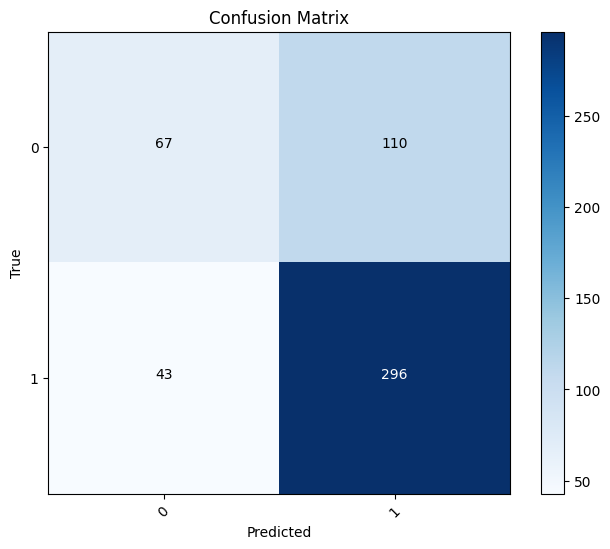

In [160]:
evaluate_model(X_test, y_test, lr)

In [161]:
team1 = 'GSW'
team2 = 'DEN'
date = '2022-01-01'
prediction = predict_outcome(team1, team2, date, lr)
if prediction is None:
    print(f"No previous data found for teams {team1} and {team2} before {date}")
else:
    print(f"The predicted outcome of the game between {team1} and {team2} on {date} is {prediction*100:.1f}% in favor of {team1} winning.")

The predicted outcome of the game between GSW and DEN on 2022-01-01 is 99.9% in favor of GSW winning.


In [166]:
team1 = 'DAL'
team2 = 'LAC'
date = '2022-12-01'
prediction = predict_outcome(team1, team2, date, lr)
if prediction is None:
    print(f"No previous data found for teams {team1} and {team2} before {date}")
else:
    print(f"The predicted outcome of the game between {team1} and {team2} on {date} is {prediction*100:.1f}% in favor of {team1} winning.")

The predicted outcome of the game between DAL and LAC on 2022-12-01 is 99.6% in favor of DAL winning.


### KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.998062015503876


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


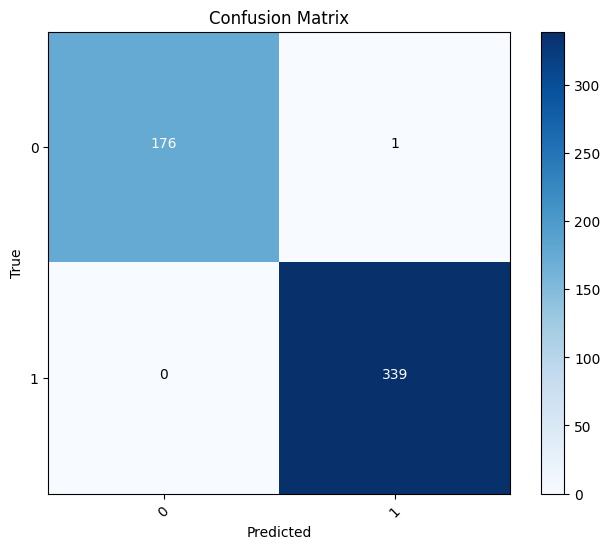

In [59]:
evaluate_model(X_test, y_test, knn)

In [60]:
team1 = 'GSW'
team2 = 'DEN'
date = '2022-01-01'
prediction = predict_outcome(team1, team2, date, knn)
if prediction is None:
    print(f"No previous data found for teams {team1} and {team2} before {date}")
else:
    print(f"The predicted outcome of the game between {team1} and {team2} on {date} is {prediction*100:.1f}% in favor of {team1} winning.")

The predicted outcome of the game between GSW and DEN on 2022-01-01 is 100.0% in favor of GSW winning.


In [173]:
team1 = 'SAC'
team2 = 'OKC'
date = '2022-12-01'
prediction = predict_outcome(team1, team2, date, lr)
if prediction is None:
    print(f"No previous data found for teams {team1} and {team2} before {date}")
else:
    print(f"The predicted outcome of the game between {team1} and {team2} on {date} is {prediction*100:.1f}% in favor of {team1} winning.")

The predicted outcome of the game between SAC and OKC on 2022-12-01 is 98.7% in favor of SAC winning.


### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
# Train the logistic regression model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7034883720930233


Accuracy: 1.00
Precision: 1.00
Recall: 0.99
F1 Score: 1.00


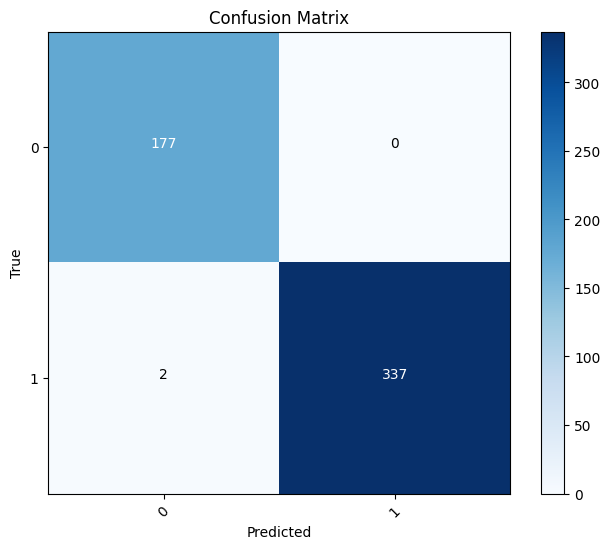

In [62]:
evaluate_model(X_test, y_test, rf)

In [63]:
team1 = 'GSW'
team2 = 'DEN'
date = '2022-01-01'
prediction = predict_outcome(team1, team2, date, rf)
if prediction is None:
    print(f"No previous data found for teams {team1} and {team2} before {date}")
else:
    print(f"The predicted outcome of the game between {team1} and {team2} on {date} is {prediction*100:.1f}% in favor of {team1} winning.")

The predicted outcome of the game between GSW and DEN on 2022-01-01 is 55.0% in favor of GSW winning.


In [180]:
team1 = 'HOU'
team2 = 'UTA'
date = '2022-01-01'
prediction = predict_outcome(team1, team2, date, rf)
if prediction is None:
    print(f"No previous data found for teams {team1} and {team2} before {date}")
else:
    print(f"The predicted outcome of the game between {team1} and {team2} on {date} is {prediction*100:.1f}% in favor of {team1} winning.")

The predicted outcome of the game between HOU and UTA on 2022-01-01 is 60.0% in favor of HOU winning.


### XGBoost

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
# Train the logistic regression model
xgb = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.01,
                                 random_state=100)
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7034883720930233


Accuracy: 0.90
Precision: 0.88
Recall: 0.97
F1 Score: 0.92


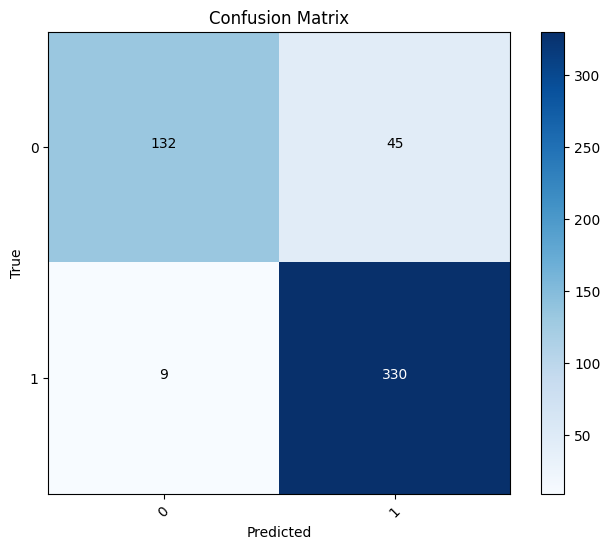

In [65]:
evaluate_model(X_test, y_test, xgb)

In [66]:
team1 = 'GSW'
team2 = 'DEN'
date = '2022-01-01'
prediction = predict_outcome(team1, team2, date, xgb)
if prediction is None:
    print(f"No previous data found for teams {team1} and {team2} before {date}")
else:
    print(f"The predicted outcome of the game between {team1} and {team2} on {date} is {prediction*100:.1f}% in favor of {team1} winning.")

The predicted outcome of the game between GSW and DEN on 2022-01-01 is 73.1% in favor of GSW winning.


In [182]:
team1 = 'SAS'
team2 = 'DEN'
date = '2022-01-01'
prediction = predict_outcome(team1, team2, date, xgb)
if prediction is None:
    print(f"No previous data found for teams {team1} and {team2} before {date}")
else:
    print(f"The predicted outcome of the game between {team1} and {team2} on {date} is {prediction*100:.1f}% in favor of {team1} winning.")

The predicted outcome of the game between SAS and DEN on 2022-01-01 is 36.7% in favor of SAS winning.


# Regression ( Predicting Score based on ELO, Carm-elo, Raptor)

### Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
# Filter column names that contain "1"
df_filtered = df.filter(like='1')

In [69]:
df_filtered.columns

Index(['team1', 'elo1_pre', 'elo_prob1', 'elo1_post', 'carm-elo1_pre',
       'carm-elo_prob1', 'carm-elo1_post', 'raptor1_pre', 'raptor_prob1',
       'score1', 'mp.1', 'mp_max.1', 'mp_opp.1', 'mp_max_opp.1', 'season.1',
       'date.1'],
      dtype='object')

In [70]:
# Select the features (independent variables) for prediction
features = ['elo1_pre', 'elo_prob1', 'elo1_post', 'carm-elo1_pre',
       'carm-elo_prob1', 'carm-elo1_post', 'raptor1_pre', 'raptor_prob1']
target = 'score1'  # Predicting Elo1_post rating

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Mean Squared Error: 127.53
R-squared (R2) Score: 0.30


In [75]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]  # Number of predictors/features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Calculate Mean Percentage Error (MPE)
mpe = np.mean((y_test - y_pred) / y_test) * 100

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Adjusted R-squared: {adjusted_r2:.2f}")
print(f"Mean Percentage Error (MPE): {-mpe:.2f}%")

Mean Squared Error (MSE): 127.53
Root Mean Squared Error (RMSE): 11.29
Mean Absolute Error (MAE): 8.82
R-squared (R2) Score: 0.30
Adjusted R-squared: 0.29
Mean Percentage Error (MPE): 0.47%


Mean Squared Error (MSE): The MSE value of 127.53 indicates the average squared difference between the actual and predicted values. It is a measure of the average squared deviation of predictions from the actual values. A higher MSE value indicates higher variance in the errors.

Root Mean Squared Error (RMSE): The RMSE value of 11.29 is the square root of the MSE. It represents the standard deviation of the residuals (the differences between predicted and actual values). Lower RMSE values indicate better model performance, as they suggest smaller deviations between predicted and actual values.

Mean Absolute Error (MAE): The MAE value of 8.82 is the average absolute difference between the predicted and actual values. It is less sensitive to outliers compared to MSE. Lower MAE values indicate better model performance in terms of absolute errors.

R-squared (R2) Score: The R-squared value of 0.30 indicates the proportion of variance in the dependent variable (target) that is explained by the independent variables in the model. An R-squared closer to 1.0 indicates a better fit, meaning that the model explains a larger proportion of the variance in the target variable. In this case, the model explains about 30% of the variance, which is moderate.

Adjusted R-squared: The Adjusted R-squared value of 0.29 considers the number of predictors in the model. It penalizes the R-squared value as more predictors are added to the model. Similar to R-squared, a higher Adjusted R-squared indicates a better fit. It is useful for comparing models with different numbers of predictors.

Mean Percentage Error (MPE): The MPE value of 0.47% represents the average percentage difference between the predicted and actual values. It measures the accuracy of predictions as a percentage. A lower MPE value indicates better accuracy of the model predictions on average.

### SVM

In [76]:
from sklearn.svm import SVR 

In [77]:
model = SVR(kernel='rbf') 

In [78]:
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error: 177.47
R-squared (R2) Score: 0.03


In [80]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]  # Number of predictors/features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Calculate Mean Percentage Error (MPE)
mpe = np.mean((y_test - y_pred) / y_test) * 100

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Adjusted R-squared: {adjusted_r2:.2f}")
print(f"Mean Percentage Error (MPE): {-mpe:.2f}%")

Mean Squared Error (MSE): 177.47
Root Mean Squared Error (RMSE): 13.32
Mean Absolute Error (MAE): 10.40
R-squared (R2) Score: 0.03
Adjusted R-squared: 0.02
Mean Percentage Error (MPE): 0.65%


Mean Squared Error (MSE): The MSE value of 177.47 is the average squared difference between the actual and predicted values. This value indicates a larger average squared deviation of predictions from the actual values compared to smaller MSE values, implying higher variability or larger errors in predictions.

Root Mean Squared Error (RMSE): The RMSE value of 13.32 is the square root of the MSE. It represents the standard deviation of the residuals. In this case, it's a larger value, indicating larger deviations between predicted and actual values compared to smaller RMSE values.

Mean Absolute Error (MAE): The MAE value of 10.40 is the average absolute difference between the predicted and actual values. It is less sensitive to outliers compared to MSE. However, this value suggests a moderate average absolute deviation between predictions and actual outcomes.

R-squared (R2) Score: The R-squared value of 0.03 suggests that only about 3% of the variance in the dependent variable (target) is explained by the independent variables in the model. This indicates that the model does not perform well in explaining the variability in the target variable based on the provided predictors.

Adjusted R-squared: The Adjusted R-squared value of 0.02 is very close to the R-squared value. This proximity suggests that adding predictors to the model didn't significantly improve the model's explanatory power. It might indicate that the model is not capturing the relationship between predictors and the target variable adequately.

Mean Percentage Error (MPE): The MPE value of 0.65% represents the average percentage difference between the predicted and actual values. It indicates a relatively low average percentage error, suggesting good accuracy on average in predicting the target variable.

### Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
model = RandomForestRegressor(n_estimators=100,
                                  random_state=0)
 

In [82]:
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error: 0.18
R-squared (R2) Score: 1.00


In [84]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]  # Number of predictors/features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Calculate Mean Percentage Error (MPE)
mpe = np.mean((y_test - y_pred) / y_test) * 100

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Adjusted R-squared: {adjusted_r2:.2f}")
print(f"Mean Percentage Error (MPE): {-mpe:.2f}%")

Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.42
Mean Absolute Error (MAE): 0.05
R-squared (R2) Score: 1.00
Adjusted R-squared: 1.00
Mean Percentage Error (MPE): 0.03%


Mean Squared Error (MSE): The MSE value of 0.18 is a very small value, indicating a minimal average squared difference between the actual and predicted values. This suggests that, on average, the model's predictions are very close to the actual values.

Root Mean Squared Error (RMSE): The RMSE value of 0.42 is the square root of the MSE. It's also a very small value, indicating extremely small deviations between predicted and actual values.

Mean Absolute Error (MAE): The MAE value of 0.05 is the average absolute difference between the predicted and actual values. It is also very small, suggesting very accurate predictions on average.

R-squared (R2) Score: The R-squared value of 1.00 indicates that the model perfectly explains the variance in the dependent variable (target) based on the independent variables. In other words, the model fits the data perfectly, and it can predict the target variable with 100% accuracy based on the provided predictors.

Adjusted R-squared: The Adjusted R-squared value of 1.00, similar to R-squared, indicates that the model fits the data perfectly and that the addition of predictors has not affected the model's explanatory power. However, in real-world scenarios, having an adjusted R-squared of exactly 1.00 might be unusual and could indicate overfitting.

Mean Percentage Error (MPE): The MPE value of 0.03% represents an extremely low average percentage difference between the predicted and actual values. It suggests almost perfect accuracy on average, with predictions very close to the actual values in percentage terms.

### Gradient Boosting

In [85]:
import xgboost as xg 

In [86]:
# Instantiation 
model = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123) 
  
# Fitting the model 
model.fit(X_train, y_train)

[05:13:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [87]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error: 38.72
R-squared (R2) Score: 0.79


In [89]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]  # Number of predictors/features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Calculate Mean Percentage Error (MPE)
mpe = np.mean((y_test - y_pred) / y_test) * 100

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Adjusted R-squared: {adjusted_r2:.2f}")
print(f"Mean Percentage Error (MPE): {mpe:.2f}%")

Mean Squared Error (MSE): 38.72
Root Mean Squared Error (RMSE): 6.22
Mean Absolute Error (MAE): 4.75
R-squared (R2) Score: 0.79
Adjusted R-squared: 0.79
Mean Percentage Error (MPE): 2.79%


Mean Squared Error (MSE): The MSE value of 38.72 indicates the average squared difference between the actual and predicted values. It represents the average magnitude of the squared errors. In this case, the value suggests a moderate level of errors in prediction.

Root Mean Squared Error (RMSE): The RMSE value of 6.22 is the square root of the MSE. It represents the standard deviation of the residuals, indicating the typical deviation of the predicted values from the actual values. A lower RMSE signifies better model performance. In this case, the RMSE suggests a moderate level of deviation.

Mean Absolute Error (MAE): The MAE value of 4.75 is the average absolute difference between the predicted and actual values. It provides a measure of the average magnitude of errors in predictions. Lower MAE values indicate better model performance in terms of absolute errors. In this case, the MAE suggests moderate errors in predictions.

R-squared (R2) Score: The R-squared value of 0.79 indicates that approximately 79% of the variance in the dependent variable (target) is explained by the independent variables in the model. It represents the goodness of fit, and a higher value closer to 1.0 indicates better model performance in explaining the variance. Here, the R-squared value suggests a good fit of the model to the data.

Adjusted R-squared: The Adjusted R-squared value of 0.79 is very close to the R-squared value, indicating that the addition of predictors to the model did not significantly change the model's explanatory power. It considers the number of predictors and penalizes the R-squared value accordingly.

Mean Percentage Error (MPE): The MPE value of 2.79% represents the average percentage difference between the predicted and actual values. It measures the accuracy of predictions in percentage terms. A lower MPE indicates better accuracy on average. In this case, the MPE suggests moderate accuracy in predictions, with an average percentage error of around 2.79%.